<a href="https://colab.research.google.com/github/Andre-1970/Machine_learning_classical_algorithms_Sem4/blob/main/Homework_3_6_jun_ml_EDA_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Разведочный анализ

Подключитесь к базе данных PostgreSQL и выгрузите таблицу `exploratory`, сохранив ее в датафрейм. <br> <br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `db_ds_students`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`.

In [7]:
import psycopg2
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
# параметры подключения
params = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "db_ds_students",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}

# установка соединения с БД
conn = psycopg2.connect(**params)

# запрос на выгрузку таблицы exploratory
query = "SELECT * FROM exploratory"

# чтение данных в датафрейм
df = pd.read_sql_query(query, conn)

# закрытие соединения с БД
conn.close()

C:\Users\baika\AppData\Local\Temp\ipykernel_18680\4244937170.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [9]:
df.head(5)

,feature_1,feature_2,feature_3,feature_4,feature_5
0,2.4399302341553932,-2.180960698389708,33.4684964804719,-1.9273880121739875,-5.3213919475057105
1,1.7705797495879034,-1.174880454210172,0.9895926481354946,-1.1396809115663187,-2.0802195404111687
2,0.7428169764168391,-0.2634829113111655,0.16814863490368492,-0.3324379721161745,-0.19571957951766614
3,-1.510891800324271,2.7125712625192238,-2.6856430298672915,2.0584952423727403,-4.098401678335551
4,-0.4835110394772655,0.096511221663355,-0.028703495808161117,0.1687629004635419,-0.04666424110766956


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   feature_1  100 non-null    object
 1   feature_2  100 non-null    object
 2   feature_3  100 non-null    object
 3   feature_4  100 non-null    object
 4   feature_5  100 non-null    object
dtypes: object(5)
memory usage: 4.0+ KB


In [11]:
for feature in df.columns:
    df[feature] = df[feature].astype('float')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  100 non-null    float64
 1   feature_2  100 non-null    float64
 2   feature_3  100 non-null    float64
 3   feature_4  100 non-null    float64
 4   feature_5  100 non-null    float64
dtypes: float64(5)
memory usage: 4.0 KB


Постройте гистограммы распределения для каждой переменной. Поэксперементируйте с количеством "разбивок" (bins). Опишите распределение каждой переменной. В каких областях (пример: от нуля до 2 расположено примерно треть всех значений) сосредоточено больше значений, в каких меньше. 

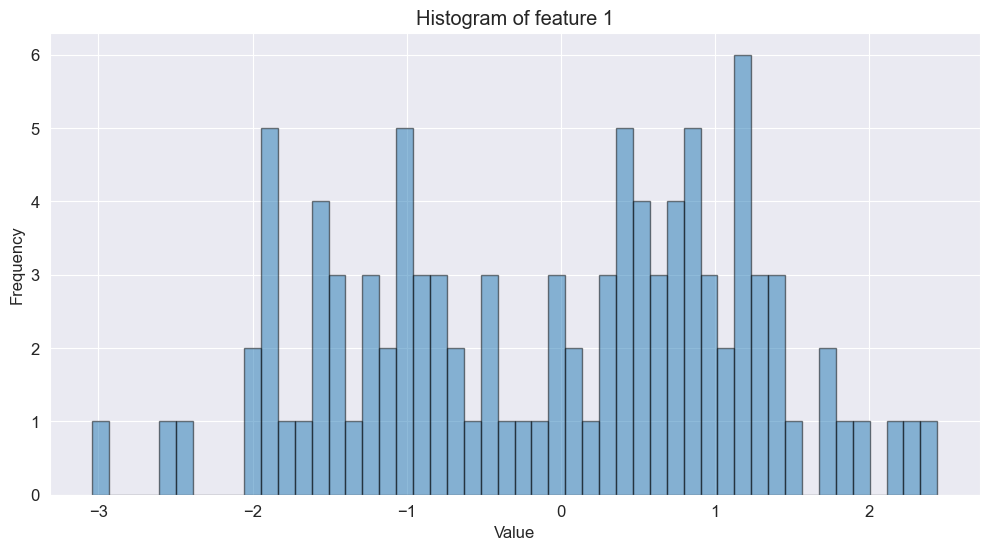

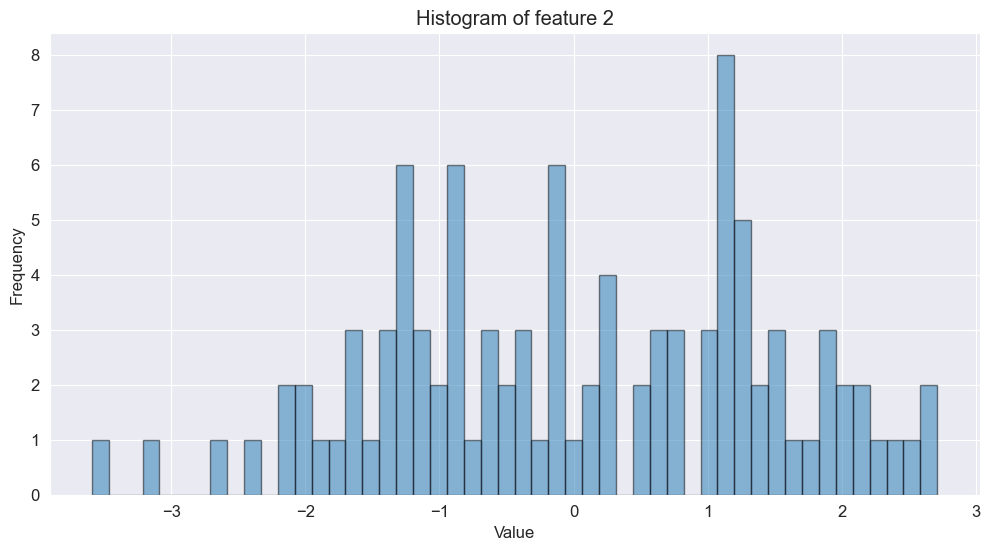

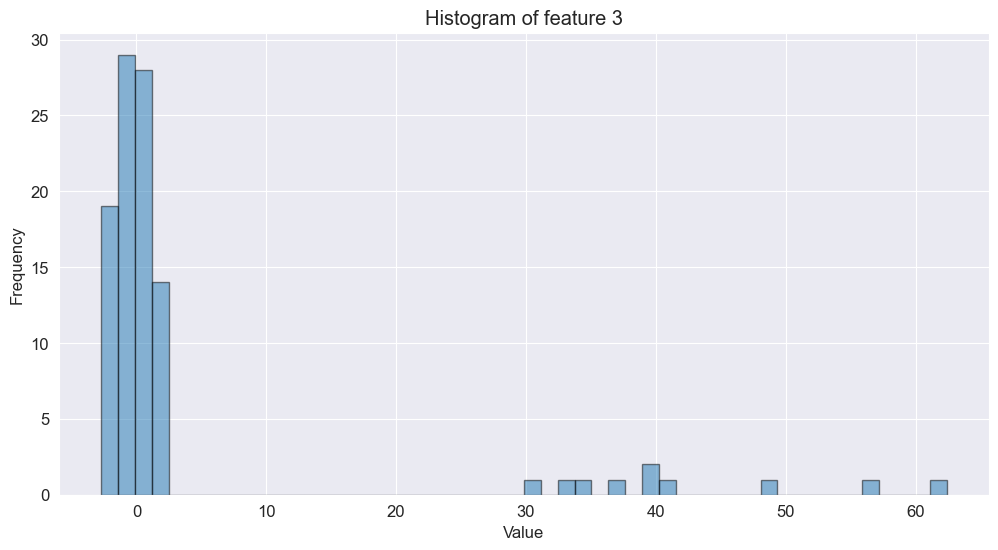

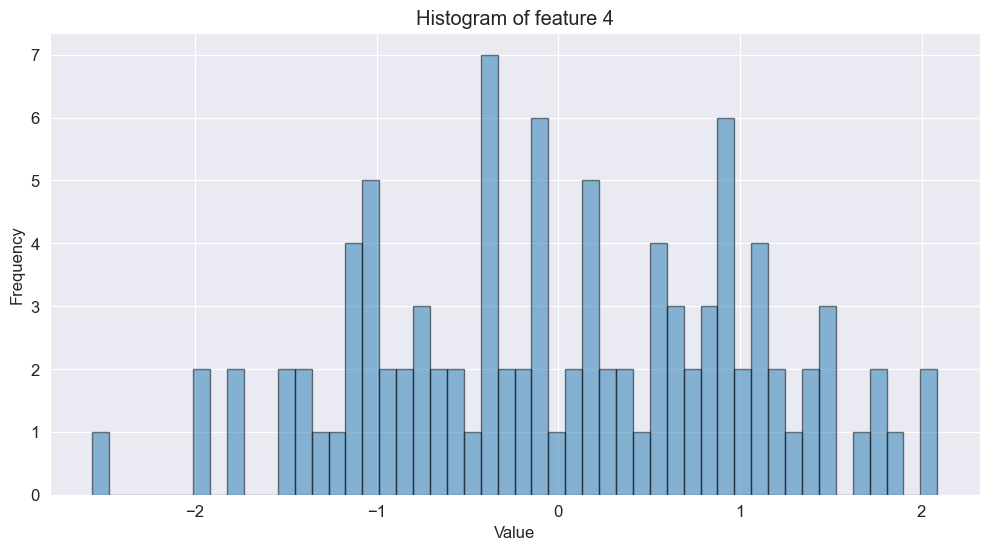

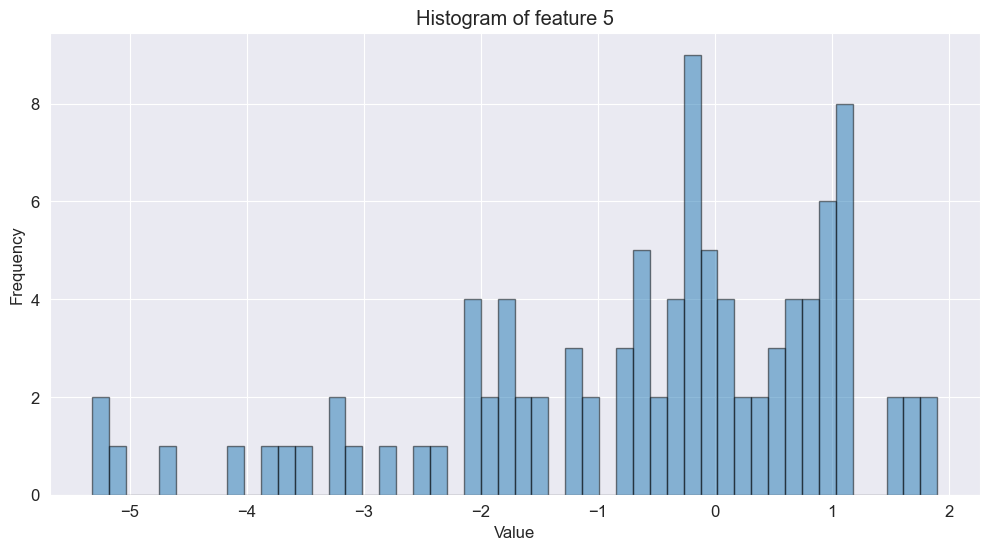

In [12]:
# установим параметры графиков
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 12})

# построим гистограммы для каждой переменной
for i in range(1, 6):
    plt.hist(df['feature_' + str(i)], bins=50, alpha=0.5, edgecolor='black')
    plt.title('Histogram of feature ' + str(i))
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [13]:
"""Тест Шапиро-Уилка"""


def stats_normal(data):
    stat, p = sm.stats.diagnostic.normal_ad(data)  # альтернативный тест на нормальность
    print(f'{data.name}\n'
          f'    Statistics={round(stat, 3)}, p={round(p, 3)}')
    if p > 0.05:
        print('     Распределение похоже на нормальное')
    else:
        print('     Распределение не похоже на нормальное')


for feature in df.columns:
    stats_normal(df[feature])

feature_1
    Statistics=1.215, p=0.003
     Распределение не похоже на нормальное
feature_2
    Statistics=0.768, p=0.044
     Распределение не похоже на нормальное
feature_3
    Statistics=24.705, p=0.0
     Распределение не похоже на нормальное
feature_4
    Statistics=0.426, p=0.309
     Распределение похоже на нормальное
feature_5
    Statistics=2.156, p=0.0
     Распределение не похоже на нормальное


* feature_1: Распределение не похоже на нормальное. Большинство значений лежит в интервале [-2, 2].
* feature_2: Распределение не похоже на нормальное. Большинство значений лежит в интервалах [-2, 0.2] и [1, 2.7].
* feature_3: Распределение не похоже на нормальное, имеет длинный правый хвост, что указывает на наличие выбросов. Большинство значений лежит в интервале [-2, 4].
* feature_4: Распределение похоже на нормальное. Большинство значений лежит в интервале [-2, 2].
* feature_5: Распределение не похоже на нормальное. Большинство значений лежит в интервале [-2, 1.1].


Тест Шапиро-Уилка - это статистический тест на нормальность распределения данных. Он используется для проверки гипотезы о том, что набор данных был взят из нормально распределенной генеральной совокупности. Тест Шапиро-Уилка основан на сравнении теоретического нормального распределения с эмпирическим распределением данных.
Процедура теста заключается в следующем:
* Сформулировать гипотезы:
** Нулевая гипотеза (H0) - данные распределены нормально.
** Альтернативная гипотеза (Ha) - данные не распределены нормально.
* Выбрать уровень значимости (обычно 0.05).
* Рассчитать статистику W и рассчитать соответствующее значение p-уровня значимости.
* Сравнить p-уровень значимости с выбранным уровнем значимости. Если p-уровень значимости меньше выбранного уровня значимости, то нулевая гипотеза отвергается в пользу альтернативной гипотезы.
Статистика W рассчитывается на основе сравнения наблюдаемых данных с теоретическим нормальным распределением. Чем ближе распределение данных к нормальному, тем ближе значение W к 1.

*Нормальное распределение (или распределение Гаусса) - это распределение вероятностей, которое имеет колоколообразную форму и является одним из наиболее распространенных в статистике. Оно характеризуется тем, что большинство значений находятся вблизи среднего значения, а чем дальше от среднего, тем меньше вероятность такого значения. Нормальное распределение встречается во многих естественных и социальных явлениях, например, в росте людей, IQ, доходах, количестве ошибок при выполнении задач и т.д.*

Постройте ящик с усами для каждой переменной. Опишите распределение данных. Прокомментируйте наличие или отсутствие выбросов.

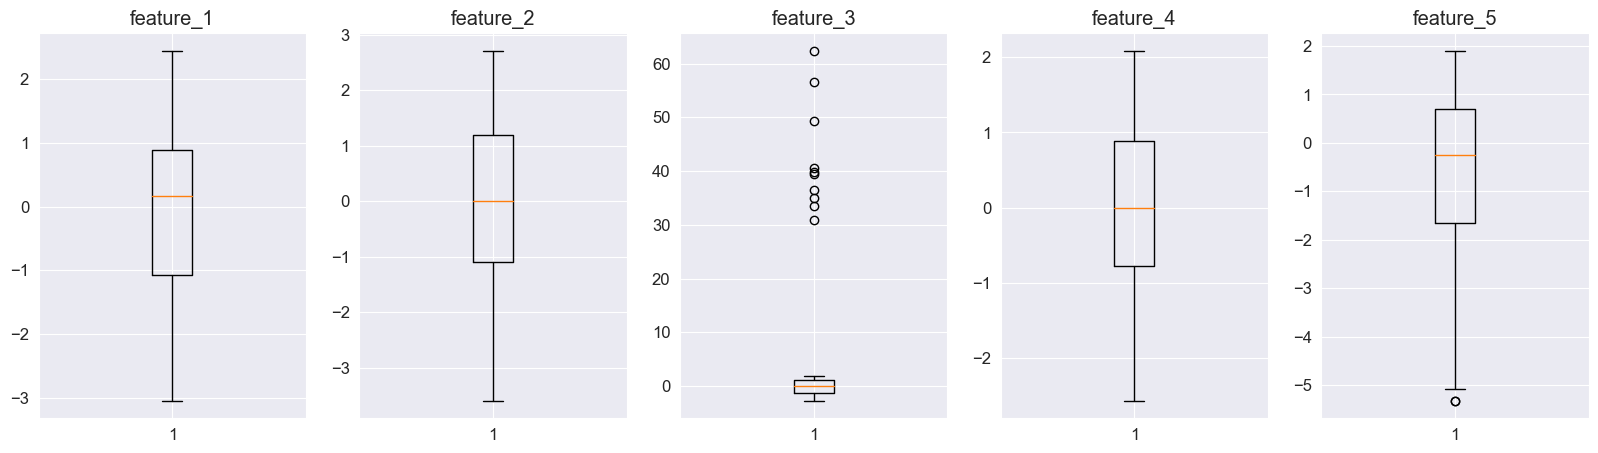

        feature_1   feature_2   feature_3   feature_4   feature_5
count  100.000000  100.000000  100.000000  100.000000  100.000000
mean    -0.065085    0.037519    3.958900    0.038294   -0.602373
std      1.248609    1.419701   13.300371    1.030048    1.658605
min     -3.042490   -3.593248   -2.725758   -2.566864   -5.325568
25%     -1.076774   -1.099268   -1.214747   -0.778637   -1.652154
50%      0.171540    0.000149   -0.046936    0.000794   -0.251712
75%      0.878959    1.186975    1.089343    0.886191    0.707675
max      2.439930    2.712571   62.381761    2.086148    1.902054


In [14]:
# Строим ящик с усами для каждой переменной
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

for i, feature in enumerate(df.columns):
    axs[i].boxplot(df[feature])
    axs[i].set_title(feature)

plt.show()

print(df.describe())

* feature_1 имеет симметричное распределение вокруг среднего значения, без выбросов.
* feature_2 имеет асимметричное распределение, с небольшим разбросом в правой части, без выбросов.
* feature_3 имеет асимметричное распределение с большим количеством выбросов. Есть несколько значений, находящихся за пределами усов.
* feature_4 имеет симметричное распределение вокруг среднего значения, без выбросов.
* feature_5 имеет асимметричное распределение, с большим разбросом в правой части. Есть один выброс со значением -5.2, который находится за пределами усов.

Допустим, мы хотим построить регрессионную модель по имеющимся данным и исследовать влияние остальных переменных на переменную `feature_4`. Постройте диаграммы рассеяния. Определите по графикам, какие независимые переменные имело бы смысл включить в модель регрессии?

In [15]:
# разделение признаков и целевой переменной
X = df.drop(['feature_4'], axis=1)
y = df['feature_4']

# разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Влияние остальных переменных на переменную feature_4:
coefficients = model.coef_
print('Влияние признаков на feature_4:')
for i in range(len(coefficients)):
    print('     feature_{}: {}'.format(i + 1, coefficients[i]))
print('Свободный член:', model.intercept_)
print('Коэффициент детерминации:', r2_score(y_test, y_pred))
print('Среднеквадратичная ошибка:', mean_squared_error(y_test, y_pred))

Влияние признаков на feature_4:
     feature_1: -0.22227381132902158
     feature_2: 0.6350666569434281
     feature_3: -4.5471376598436584e-17
     feature_4: -2.676017684943165e-16
Свободный член: 6.245004513516506e-17
Коэффициент детерминации: 1.0
Среднеквадратичная ошибка: 6.075105268326487e-31


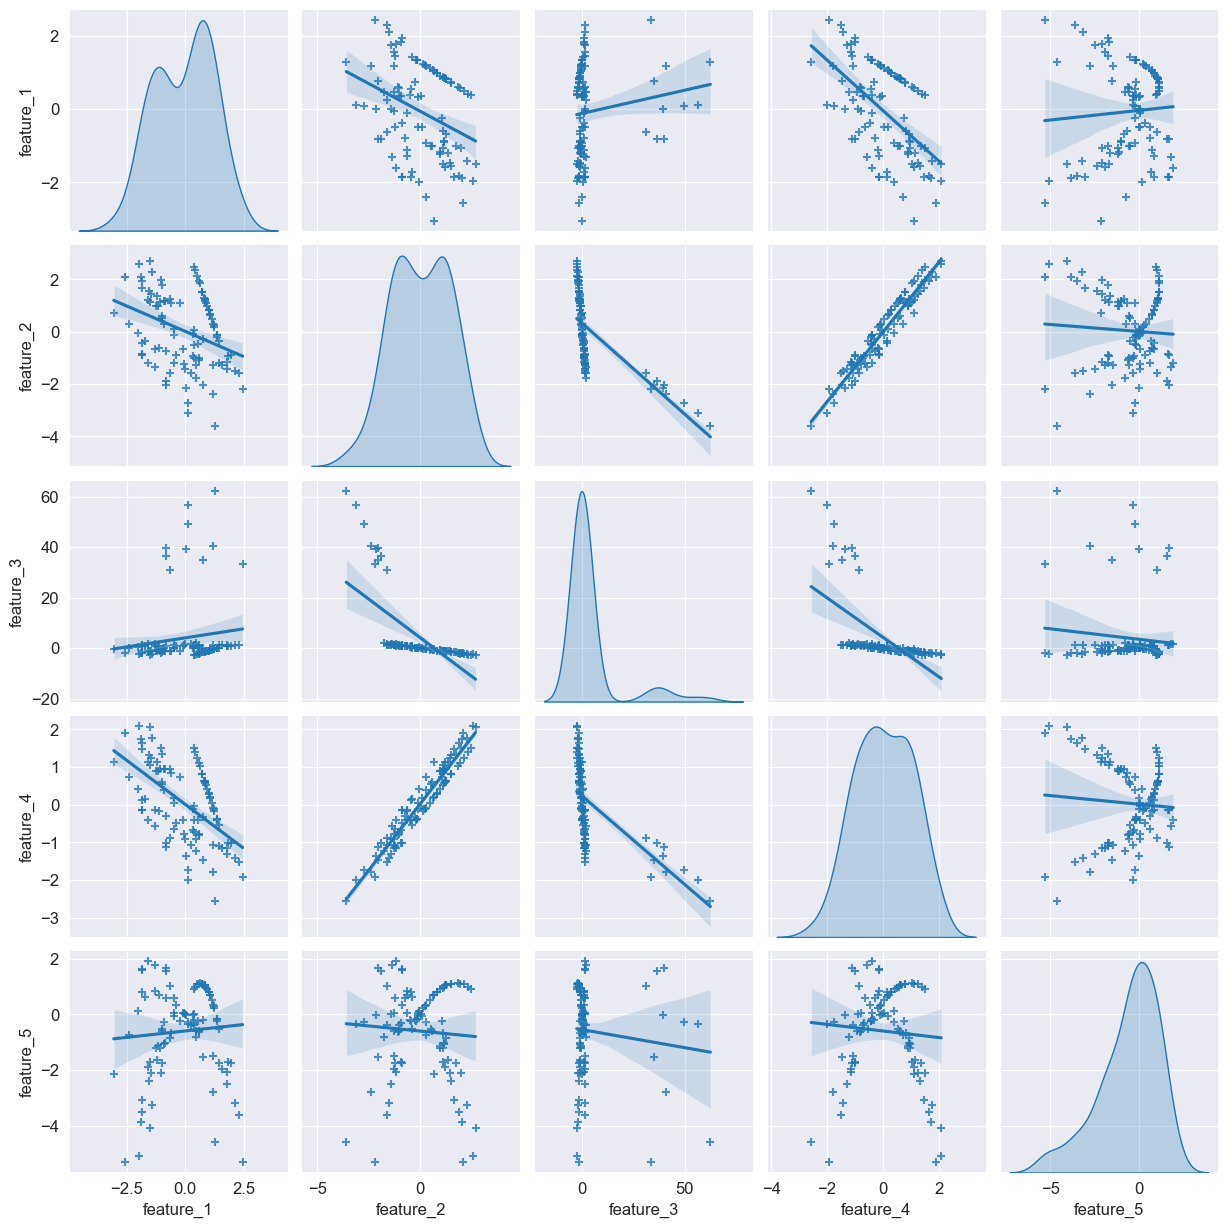

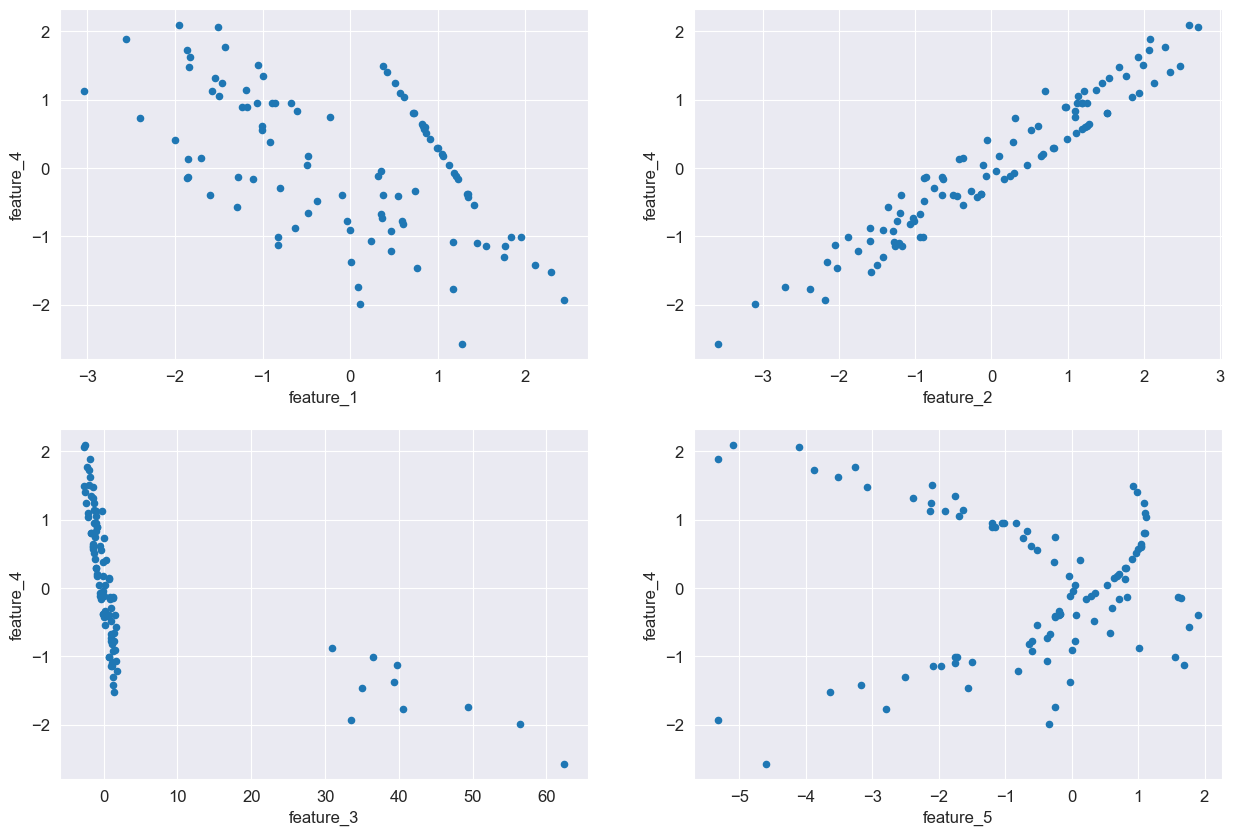

In [16]:
# Диаграммы рассеяния

sns.pairplot(df,
             kind='reg', diag_kind='kde', markers='+')
plt.show()


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, feature in enumerate(df.columns.drop('feature_4')):
    df.plot.scatter(x=feature,
                    y='feature_4',
                    ax=axes[i // 2, i % 2])

plt.show()

На основании построенных диаграмм можно сделать вывод, что в модель регрессии имеет смысл включить признаки feature_1, feature_2 и feature_3.